# Factores de éxito en canciones para ser tendencia en Spotify México 2021

Los datos utilizados provienen de dos fuentes distintas:
https://spotifycharts.com/home/ y https://developer.spotify.com/, de charts.spotify.com contiene las 200 canciones más escuchadas semanalmente en México, proporcionándonos como muestra los datos del 11/03/2021 hasta 02/09/2021.

Primero de https://spotifycharts.com/home/ descarge los datos semanales, visualizando los archivos descargados: 

In [61]:
import os
import numpy as np
import pandas as pd
week_streams = []
for dirname,_,filenames in os.walk('../data/external/'):
    for filename in filenames:
        print (os.path.join(filename))
        code = filename[:2]
        if not (code in week_streams) and code.isalpha() and code.isupper():
            week_streams.append (code)
week_streams.sort()
week_streams

.gitkeep
regional-mx-weekly-2021-03-11.csv
regional-mx-weekly-2021-03-18.csv
regional-mx-weekly-2021-03-25.csv
regional-mx-weekly-2021-04-01.csv
regional-mx-weekly-2021-04-08.csv
regional-mx-weekly-2021-04-15.csv
regional-mx-weekly-2021-04-22.csv
regional-mx-weekly-2021-04-29.csv
regional-mx-weekly-2021-05-06.csv
regional-mx-weekly-2021-05-13.csv
regional-mx-weekly-2021-05-20.csv
regional-mx-weekly-2021-05-27.csv
regional-mx-weekly-2021-06-03.csv
regional-mx-weekly-2021-06-10.csv
regional-mx-weekly-2021-06-17.csv
regional-mx-weekly-2021-06-24.csv
regional-mx-weekly-2021-07-01.csv
regional-mx-weekly-2021-07-08.csv
regional-mx-weekly-2021-07-15.csv
regional-mx-weekly-2021-07-22.csv
regional-mx-weekly-2021-07-29.csv
regional-mx-weekly-2021-08-05.csv
regional-mx-weekly-2021-08-12.csv
regional-mx-weekly-2021-08-19.csv
regional-mx-weekly-2021-08-26.csv
regional-mx-weekly-2021-09-02.csv


[]

Procedí a juntar los datos en un mismo archivo, el modulo glob me permitio encontrar los nombres que se asemejan al patron: regional-mx-weekly, que son los archivos que nos interesa juntar.

In [2]:
import os
import numpy as np
import pandas as pd
import glob

all_files=glob.glob("../data/external/regional-mx-weekly*.csv")
print("Numero de archivos:",len(all_files),"\n")
all_files

Numero de archivos: 26 



['../data/external\\regional-mx-weekly-2021-03-11.csv',
 '../data/external\\regional-mx-weekly-2021-03-18.csv',
 '../data/external\\regional-mx-weekly-2021-03-25.csv',
 '../data/external\\regional-mx-weekly-2021-04-01.csv',
 '../data/external\\regional-mx-weekly-2021-04-08.csv',
 '../data/external\\regional-mx-weekly-2021-04-15.csv',
 '../data/external\\regional-mx-weekly-2021-04-22.csv',
 '../data/external\\regional-mx-weekly-2021-04-29.csv',
 '../data/external\\regional-mx-weekly-2021-05-06.csv',
 '../data/external\\regional-mx-weekly-2021-05-13.csv',
 '../data/external\\regional-mx-weekly-2021-05-20.csv',
 '../data/external\\regional-mx-weekly-2021-05-27.csv',
 '../data/external\\regional-mx-weekly-2021-06-03.csv',
 '../data/external\\regional-mx-weekly-2021-06-10.csv',
 '../data/external\\regional-mx-weekly-2021-06-17.csv',
 '../data/external\\regional-mx-weekly-2021-06-24.csv',
 '../data/external\\regional-mx-weekly-2021-07-01.csv',
 '../data/external\\regional-mx-weekly-2021-07-0

Teniendo la lista de rutas de los archivos procedi a unirlos en una lista con el metodo append para despues pasarlos a Data Frame por el metodo concat.

La variable nombre la agrege para identificar de que archivo proviene el dato y no ver irregularidades con estos.

In [3]:
file_list=[]
for i in all_files:
    data=pd.read_csv(i)
    nombre=os.path.basename(i)
    data['source_file']=nombre
    file_list.append(data)


df=pd.concat(file_list,ignore_index=True)
print("Numero de filas:",len(df))
df.tail()

Numero de filas: 5198


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,source_file
5193,196,spotify:track:2N8m6CYs74qQO4mjVcXO30,Tones And I,Dance Monkey,Elektra (NEK),2,194,103,638567,regional-mx-weekly-2021-09-02.csv
5194,197,spotify:track:4VepTqzlmZvNAAjUhdBhOP,El Mimoso Luis Antonio López,En Esta Vida No Se Pudo,Music VIP Entertainment Inc,168,168,4,634470,regional-mx-weekly-2021-09-02.csv
5195,198,spotify:track:0zCOT028cU3DeCqN1G18wE,Inspector,Amargo Adiós,Universal Music Mexico,110,196,110,628834,regional-mx-weekly-2021-09-02.csv
5196,199,spotify:track:0MMyJUC3WNnFS1lit5pTjk,Olivia Rodrigo,"jealousy, jealousy",Olivia Rodrigo PS,145,188,11,628722,regional-mx-weekly-2021-09-02.csv
5197,200,spotify:track:3V1jBnDI3zCn25ONFiqwN8,T3R Elemento,Ojitos de Miel,DEL Records,152,191,14,626521,regional-mx-weekly-2021-09-02.csv


Al querer trabajar con datos de corte transversal, tuve que sumar las reproducciones semanales de cada cancion para conocer sus reproducciones totales en aproximadamente 6 meses, por eso las agrupe por el identificador de las canciones 'uri' y sume el total de la columna 'streams' por canción. 

Ya que se puede identificar la canción por su 'Uri' las otras columnas no son necesarias

In [6]:
df=df.groupby('uri').streams.sum()
df=pd.DataFrame(df)
df

,streams
uri,
spotify:track:00jpfco62YfQj1BBYCCuKH,4051501
spotify:track:00szcRmgqJGtqrfIUYkM1h,24711771
spotify:track:017PF4Q3l4DBUiWoXk4OWT,11778346
spotify:track:03LfOYi0icz4souspZVVhq,8754615
spotify:track:059bcIhyc2SBwm6sw2AZzd,9978800
...,...
spotify:track:7vrJn5hDSXRmdXoR30KgF1,12770574
spotify:track:7wnO6pBzcWWT8zT4vFx7hM,4507455
spotify:track:7x4ASXYEKfQBCewcZhK776,3305171


Ordene las canciones por el numero de reproducciones para observar los extremos:

Lo pase a un archivo csv para despues agregar las caracteristicas que tienen cada cancion.

In [26]:
df=df.sort_values('streams')
print(df)
df.to_csv("../data/interim/datos_sum.csv")

                                        streams
uri                                            
spotify:track:7EUvcSFkyVB73zrblhQmEL     608040
spotify:track:43Z6YxVTYyr5ewyo2uepdy     609073
spotify:track:4skuEIloXWuxxgekKupkEH     609256
spotify:track:6Im9k8u9iIzKMrmV7BWtlF     609591
spotify:track:6ocbgoVGwYJhOv1GgI9NsF     610280
...                                         ...
spotify:track:6tDDoYIxWvMLTdKpjFkc1B   74503626
spotify:track:2JPLbjOn0wPCngEot2STUS   88058478
spotify:track:4MzXwWMhyBbmu6hOcLVD49   89982950
spotify:track:7Bk0uXKk1uPT0XuQbpFzvs   94288622
spotify:track:2MnLkFqY9Rpg9s3Zv6ZJdK  116313570

[447 rows x 1 columns]


Con el identificador de las canciones(uri) y la Api de Spotify obtenemos las características de estas junto con el siguiente programa.

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pandas as pd

In [10]:
client_credentials_manager = SpotifyClientCredentials(client_id="e3aa2b0ba2664fc384f7081a2121f66c",
                                                    client_secret="c2123cf1707f4a95a384f7a3a7b570c0")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [11]:
import pandas as pd
archivo='../data/interim/datos_sum.csv'
df=pd.read_csv(archivo)

uri=df['uri'].tolist()
song_list=[]
for i in range(len(uri)):
    data=pd.DataFrame(sp.audio_features(uri[i]),columns=['danceability','energy','duration_ms','loudness','speechiness','instrumentalness','liveness','valence','tempo','acousticness'])               
    song_list.append(data)


df=pd.concat(song_list,ignore_index=True)
print("Numero de filas:",len(df))
df.head()
#df.to_csv("../data/interim/features.csv")

Numero de filas: 447


,danceability,energy,duration_ms,loudness,speechiness,instrumentalness,liveness,valence,tempo,acousticness
0,0.762,0.645,187429,-5.422,0.2720,0.000013,0.1180,0.640,180.125,0.2410
1,0.756,0.565,226280,-9.832,0.0287,0.001280,0.2430,0.655,101.944,0.3090
2,0.394,0.475,278547,-7.935,0.0280,0.007490,0.1120,0.441,129.995,0.0251
3,0.830,0.585,173711,-6.476,0.0940,0.000000,0.2480,0.485,109.978,0.2370
4,0.778,0.317,178627,-10.732,0.3340,0.000000,0.0881,0.327,140.048,0.5920


In [12]:
df.describe()

,danceability,energy,duration_ms,loudness,speechiness,instrumentalness,liveness,valence,tempo,acousticness
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.00000,447.000000,447.000000,447.000000
mean,0.709085,0.633823,207386.203579,-5.744105,0.101689,0.005455,0.16471,0.634582,124.654617,0.288024
std,0.125125,0.146554,41682.196056,2.341133,0.086908,0.043392,0.12267,0.207331,33.070646,0.229309
min,0.278000,0.159000,122773.000000,-17.237000,0.025800,0.000000,0.01900,0.039500,69.754000,0.000818
25%,0.632500,0.536500,180600.000000,-6.935000,0.042300,0.000000,0.09285,0.505000,95.370500,0.095600
50%,0.731000,0.652000,202735.000000,-5.198000,0.067900,0.000000,0.11800,0.666000,117.948000,0.241000
75%,0.799000,0.741000,228732.500000,-4.066000,0.118000,0.000027,0.20100,0.798500,152.084000,0.419500
max,0.967000,0.913000,393280.000000,-0.515000,0.475000,0.552000,0.96700,0.976000,200.156000,0.985000


Lo pase a un archivo csv para juntarlo con las reproducciones que tienen cada cancion del archivo anterior.

In [103]:
df.to_csv("../data/interim/features.csv")

Para juntarlo ocupe la funcion merge para poder colocar los datos a la derecha de las reproducciones, despues lo pase a formato parquet para implementarlo en el modelo de regresion lineal multiple.

In [110]:
import pandas as pd
archivo1='../data/interim/datos_sum.csv'
df1=pd.read_csv(archivo1)

archivo2='../data/interim/features.csv'
df2=pd.read_csv(archivo2)

df=pd.merge(df1,df2,left_index=True,right_index=True)
df=df.drop(['Unnamed: 0'],axis=1)
df.to_parquet('../data/processed/Streamsfeatures.parquet')
df

,uri,streams,danceability,energy,duration_ms,loudness,speechiness,instrumentalness,liveness,valence,tempo,acousticness
0,spotify:track:7EUvcSFkyVB73zrblhQmEL,608040,0.762,0.645,187429,-5.422,0.2720,0.000013,0.1180,0.640,180.125,0.2410
1,spotify:track:43Z6YxVTYyr5ewyo2uepdy,609073,0.756,0.565,226280,-9.832,0.0287,0.001280,0.2430,0.655,101.944,0.3090
2,spotify:track:4skuEIloXWuxxgekKupkEH,609256,0.394,0.475,278547,-7.935,0.0280,0.007490,0.1120,0.441,129.995,0.0251
3,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,609591,0.830,0.585,173711,-6.476,0.0940,0.000000,0.2480,0.485,109.978,0.2370
4,spotify:track:6ocbgoVGwYJhOv1GgI9NsF,610280,0.778,0.317,178627,-10.732,0.3340,0.000000,0.0881,0.327,140.048,0.5920
...,...,...,...,...,...,...,...,...,...,...,...,...
442,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,74503626,0.653,0.524,160191,-9.016,0.0502,0.000000,0.2030,0.553,83.970,0.1120
443,spotify:track:2JPLbjOn0wPCngEot2STUS,88058478,0.644,0.648,206710,-4.601,0.1180,0.000000,0.1350,0.440,179.951,0.2760
444,spotify:track:4MzXwWMhyBbmu6hOcLVD49,89982950,0.731,0.573,205090,-10.059,0.0544,0.000052,0.1130,0.145,109.928,0.4010
445,spotify:track:7Bk0uXKk1uPT0XuQbpFzvs,94288622,0.849,0.701,261667,-4.407,0.0600,0.000000,0.1120,0.505,98.005,0.4070


Ya con los datos realize una visualizacion general de los datos:

In [111]:
import pandas as pd
music=pd.read_parquet('../data/processed/Streamsfeatures.parquet')
music

,uri,streams,danceability,energy,duration_ms,loudness,speechiness,instrumentalness,liveness,valence,tempo,acousticness
0,spotify:track:7EUvcSFkyVB73zrblhQmEL,608040,0.762,0.645,187429,-5.422,0.2720,0.000013,0.1180,0.640,180.125,0.2410
1,spotify:track:43Z6YxVTYyr5ewyo2uepdy,609073,0.756,0.565,226280,-9.832,0.0287,0.001280,0.2430,0.655,101.944,0.3090
2,spotify:track:4skuEIloXWuxxgekKupkEH,609256,0.394,0.475,278547,-7.935,0.0280,0.007490,0.1120,0.441,129.995,0.0251
3,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,609591,0.830,0.585,173711,-6.476,0.0940,0.000000,0.2480,0.485,109.978,0.2370
4,spotify:track:6ocbgoVGwYJhOv1GgI9NsF,610280,0.778,0.317,178627,-10.732,0.3340,0.000000,0.0881,0.327,140.048,0.5920
...,...,...,...,...,...,...,...,...,...,...,...,...
442,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,74503626,0.653,0.524,160191,-9.016,0.0502,0.000000,0.2030,0.553,83.970,0.1120
443,spotify:track:2JPLbjOn0wPCngEot2STUS,88058478,0.644,0.648,206710,-4.601,0.1180,0.000000,0.1350,0.440,179.951,0.2760
444,spotify:track:4MzXwWMhyBbmu6hOcLVD49,89982950,0.731,0.573,205090,-10.059,0.0544,0.000052,0.1130,0.145,109.928,0.4010
445,spotify:track:7Bk0uXKk1uPT0XuQbpFzvs,94288622,0.849,0.701,261667,-4.407,0.0600,0.000000,0.1120,0.505,98.005,0.4070


                                             |                                             | [  0%]   00:00 ->…

c:\users\jesus\desktop\spoty project\env\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
c:\users\jesus\desktop\spoty project\env\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
c:\users\jesus\desktop\spoty project\env\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
c:\users\jesus\desktop\spoty project\env\lib\site-packages\sweetviz\graph_as


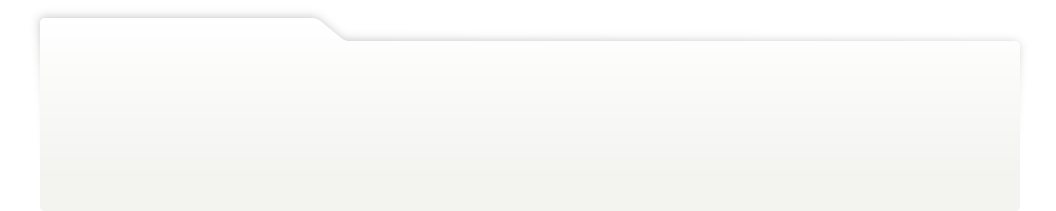
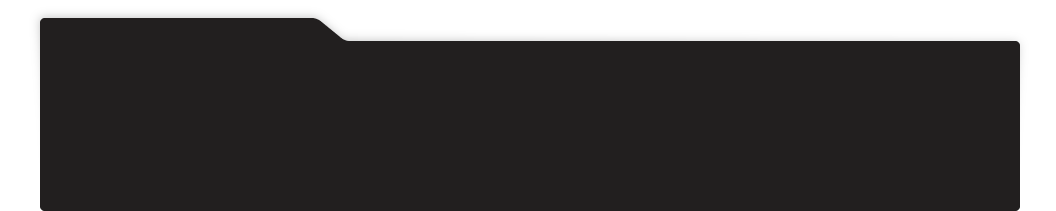
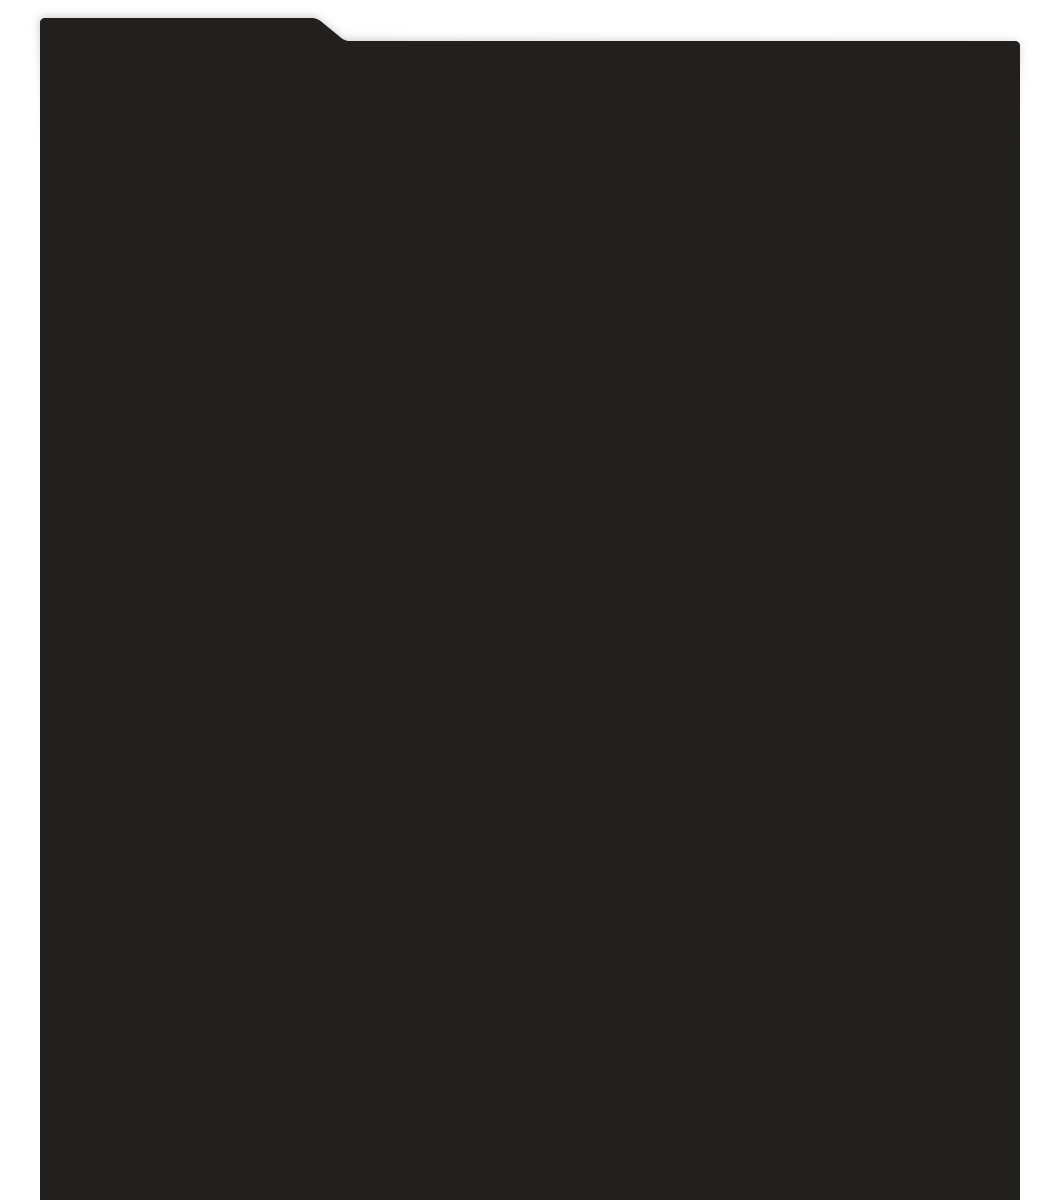
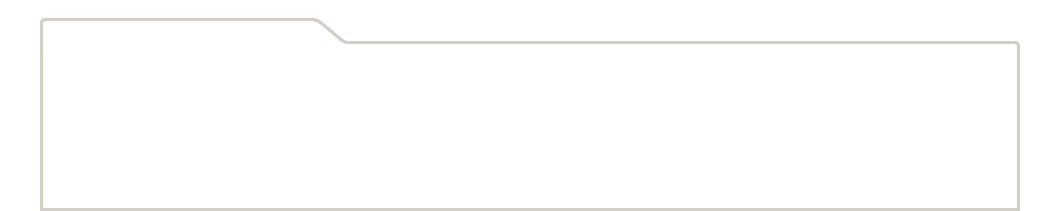
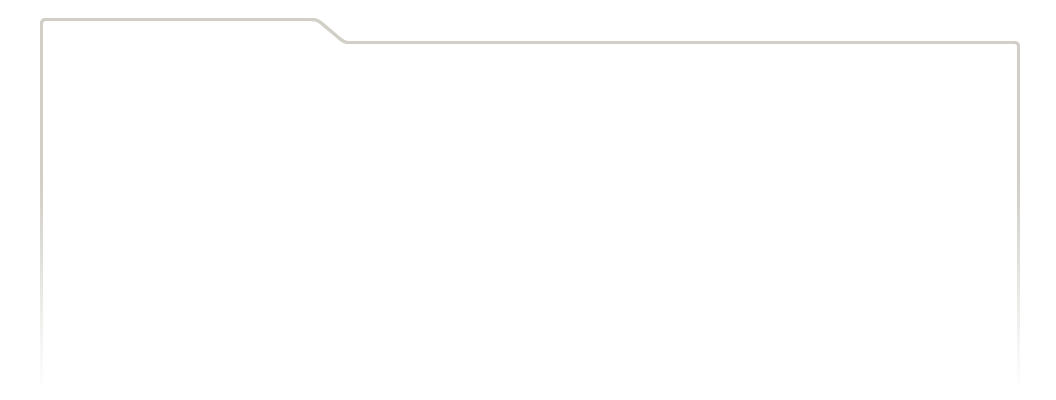
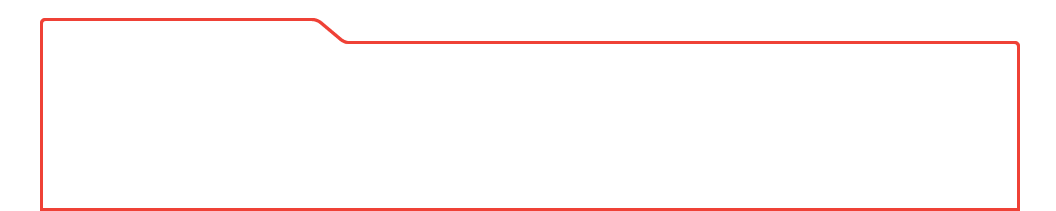
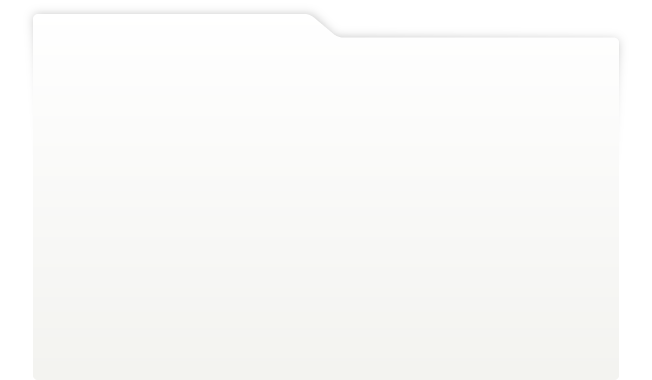
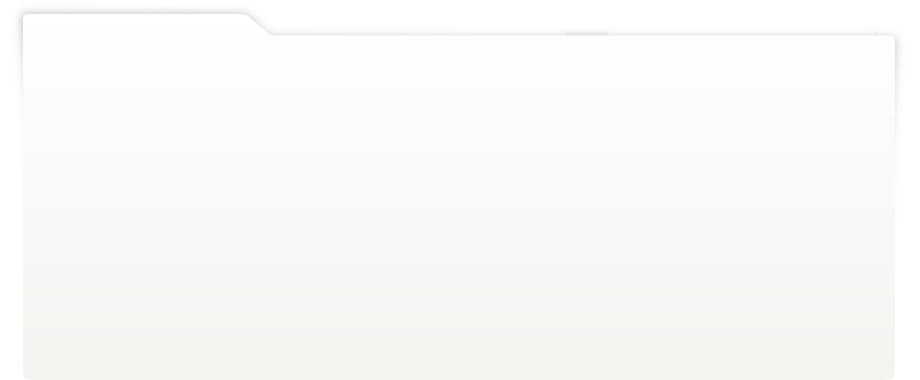
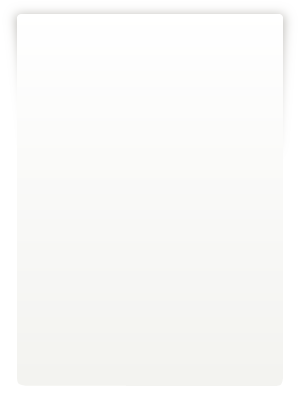
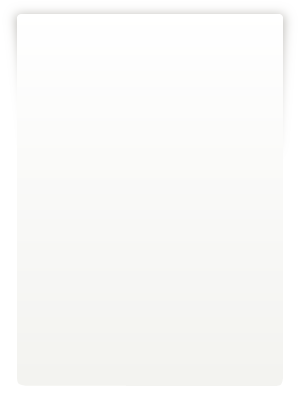
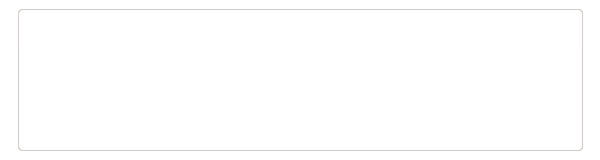
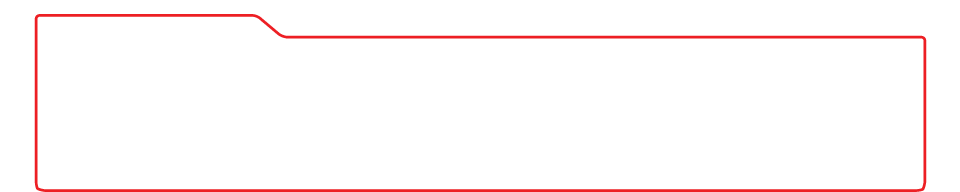
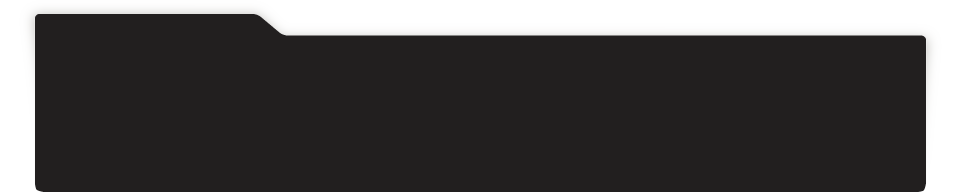
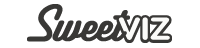
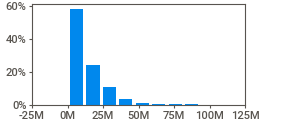
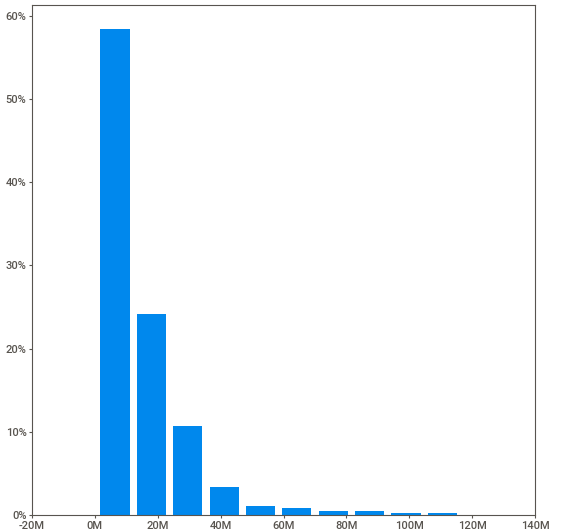
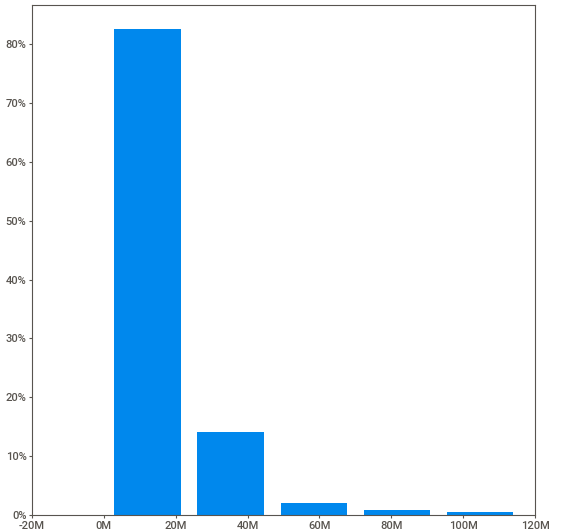
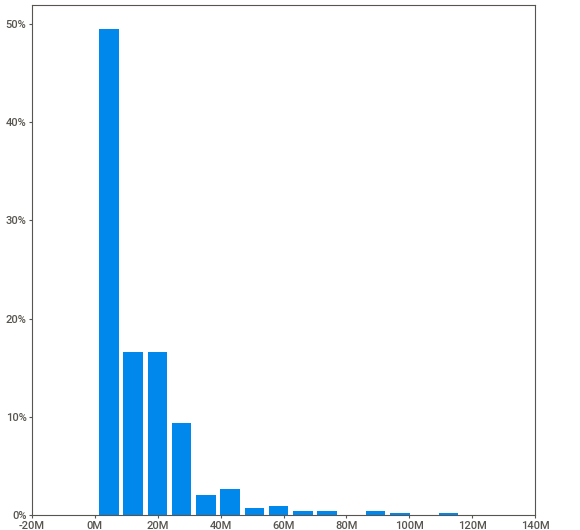
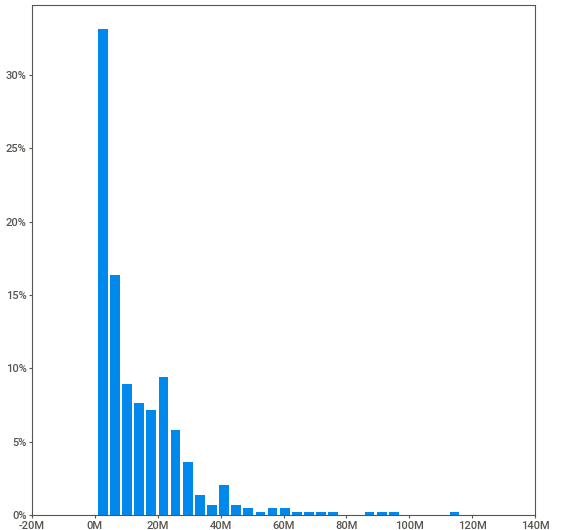
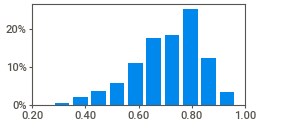
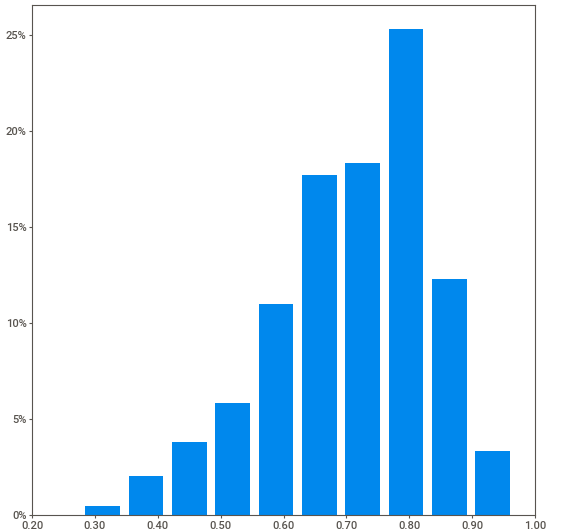
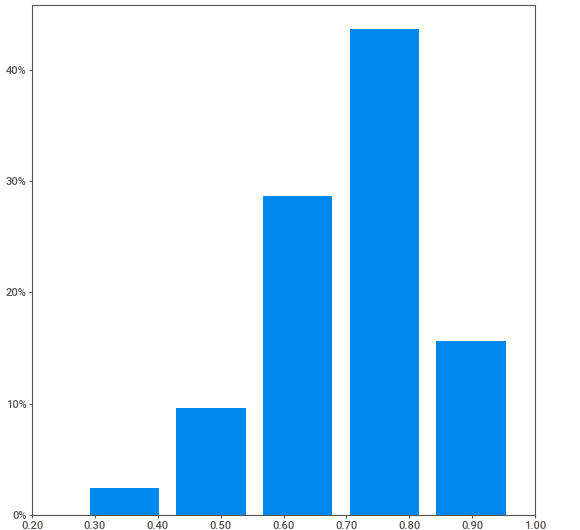
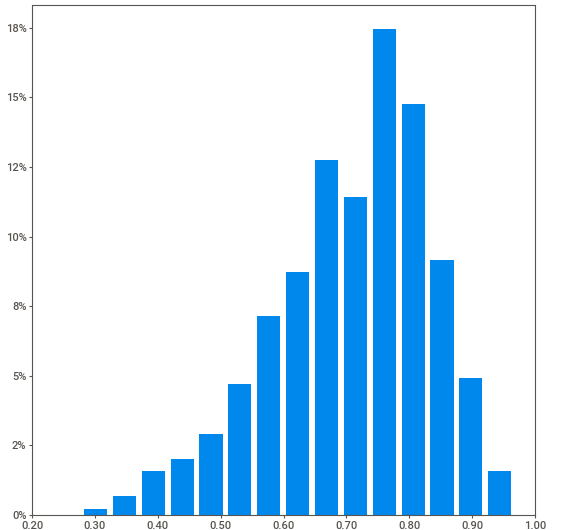
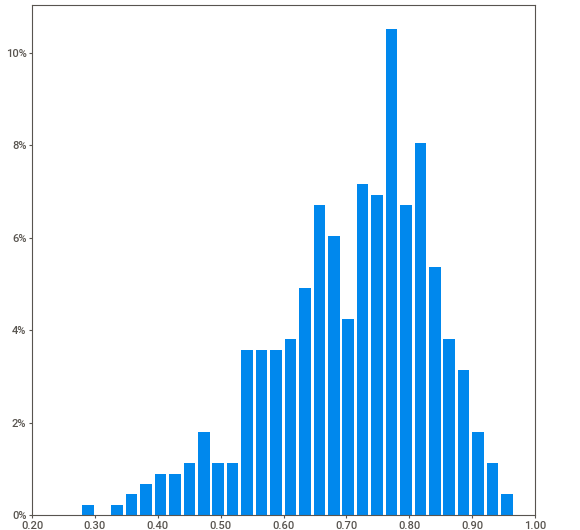
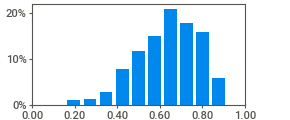
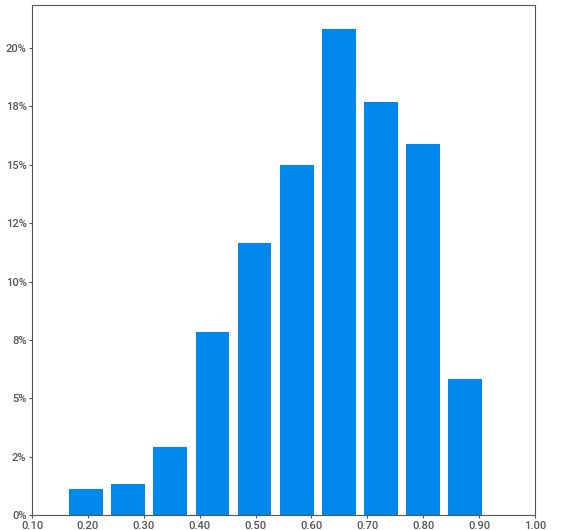
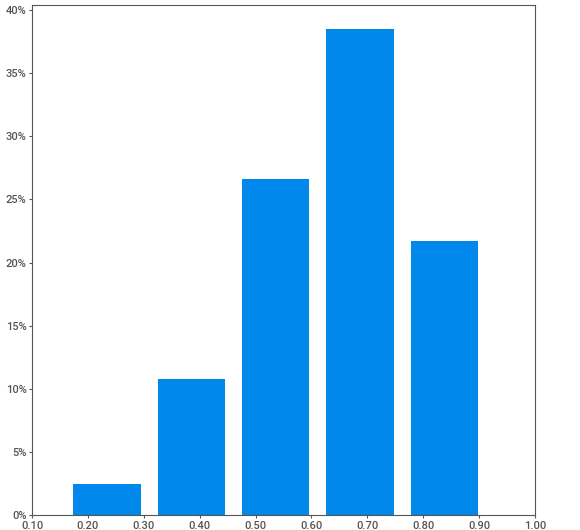
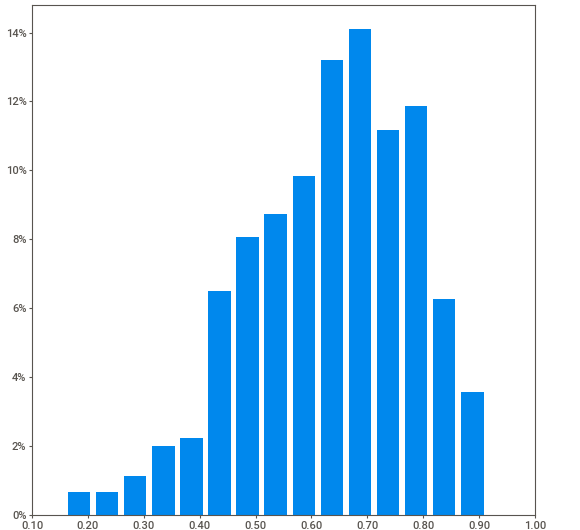
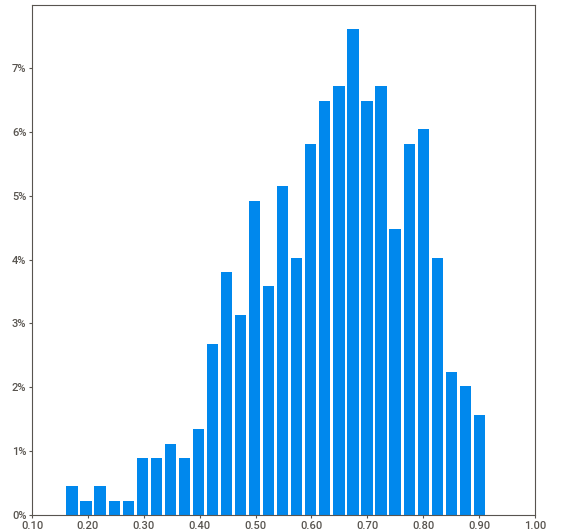
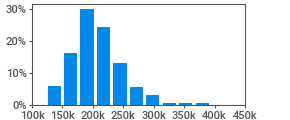
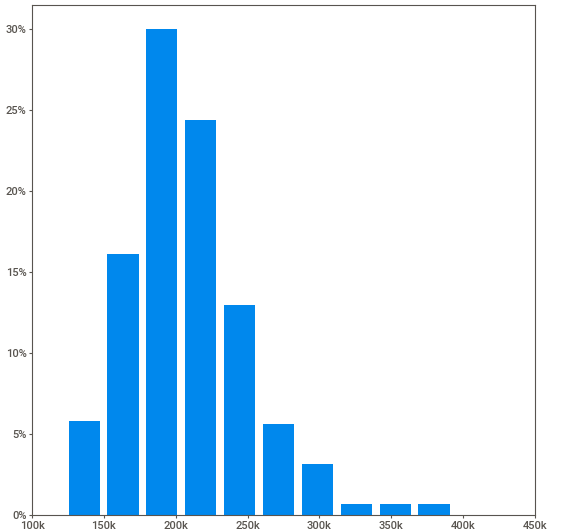
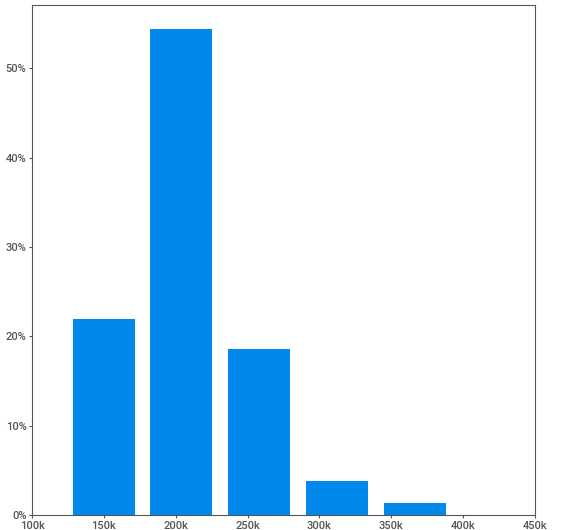
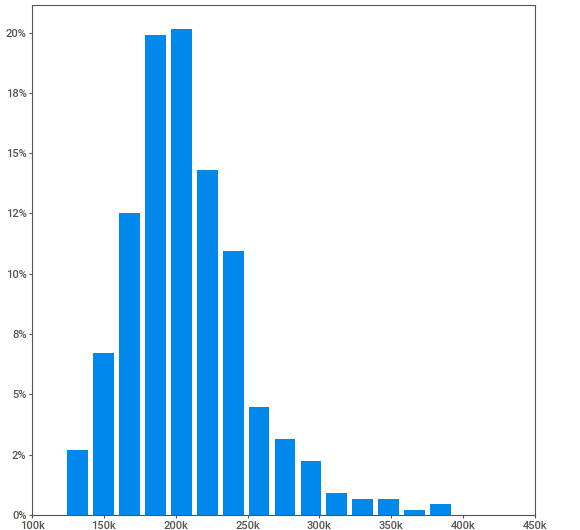
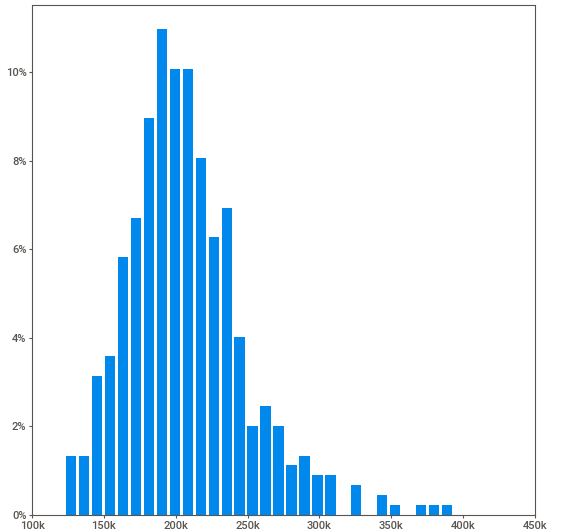
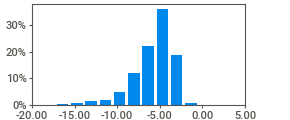
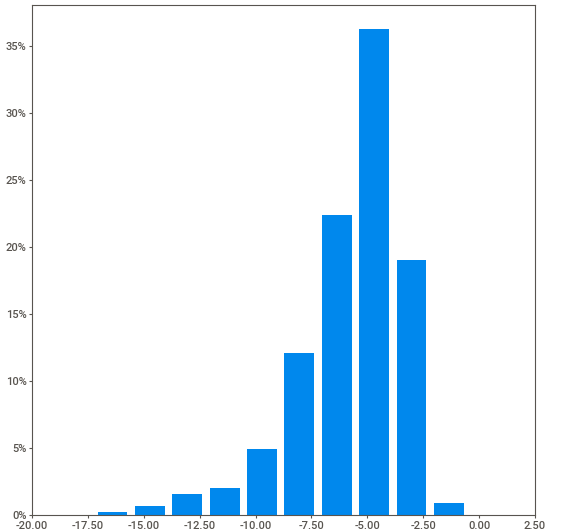
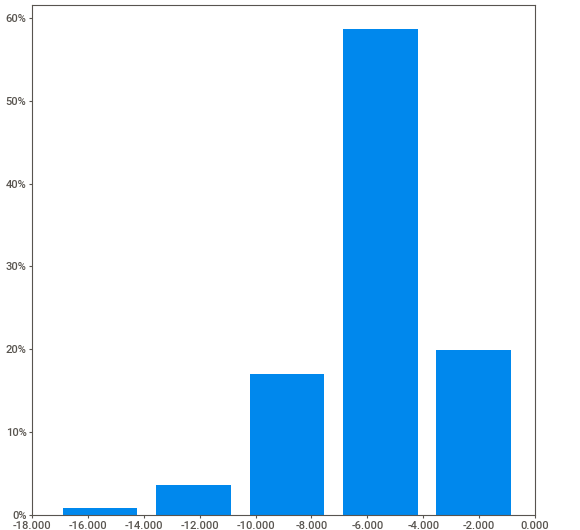
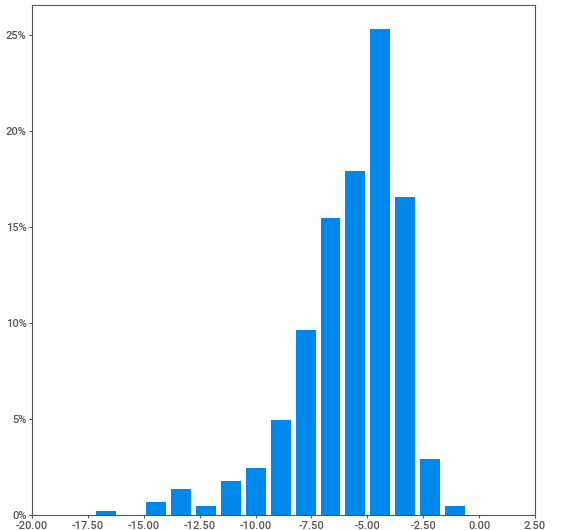
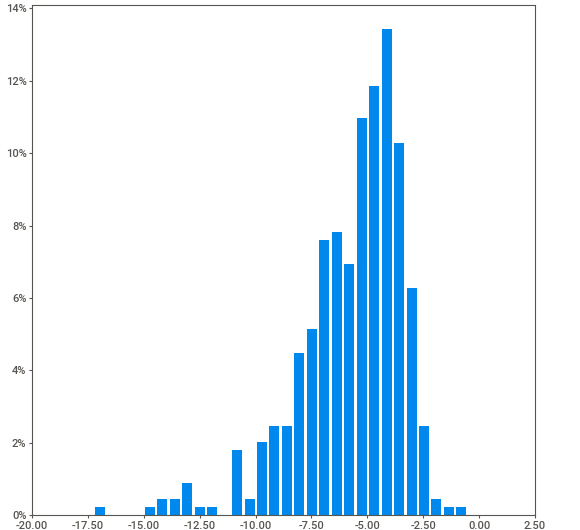
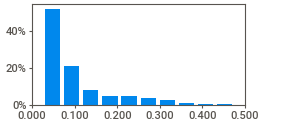
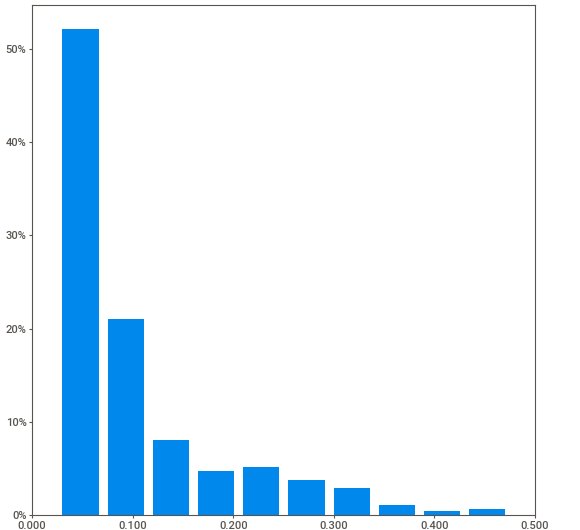
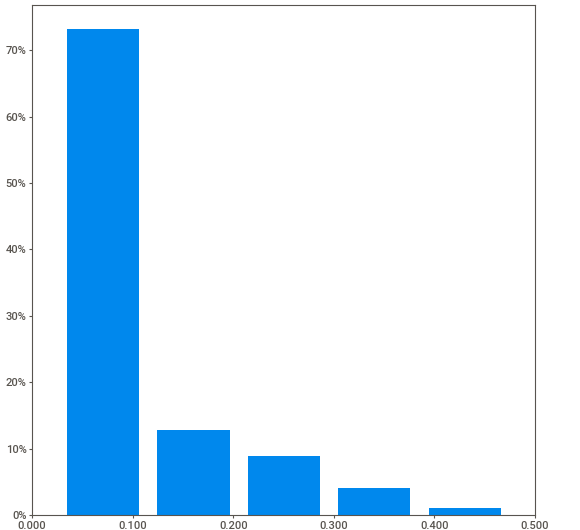
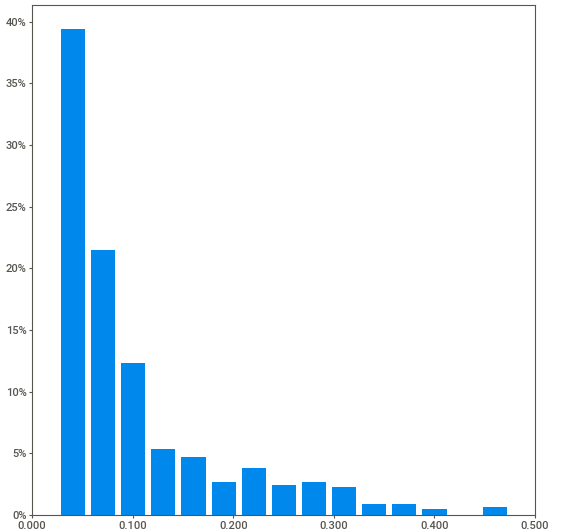
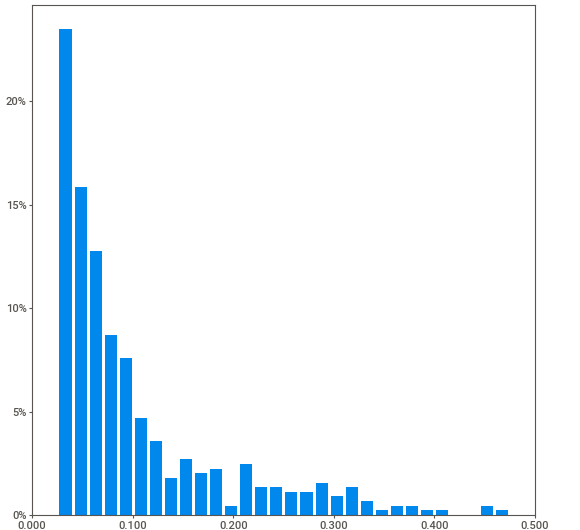
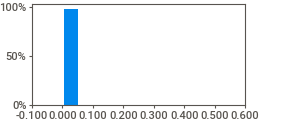
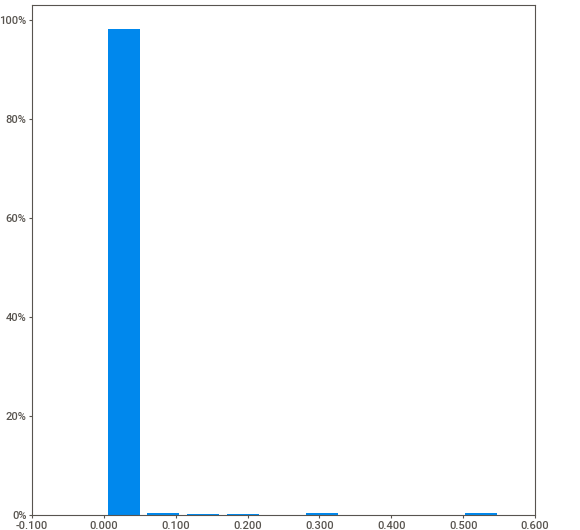
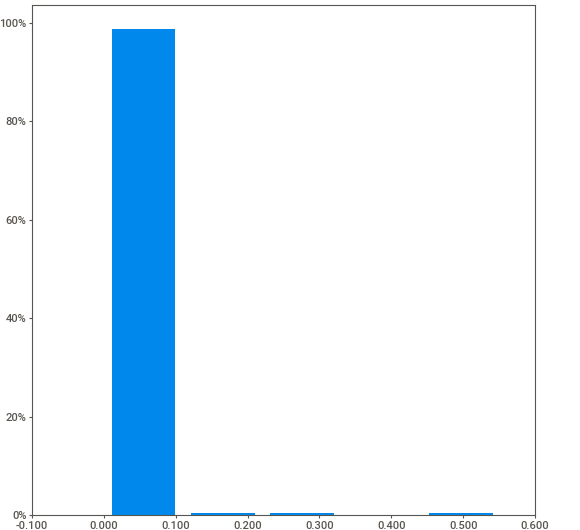
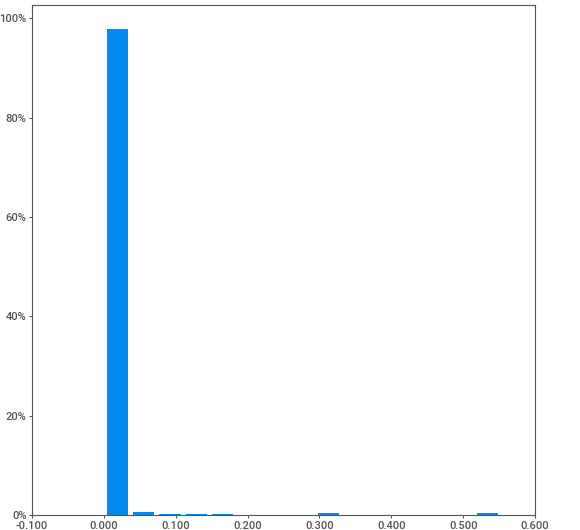
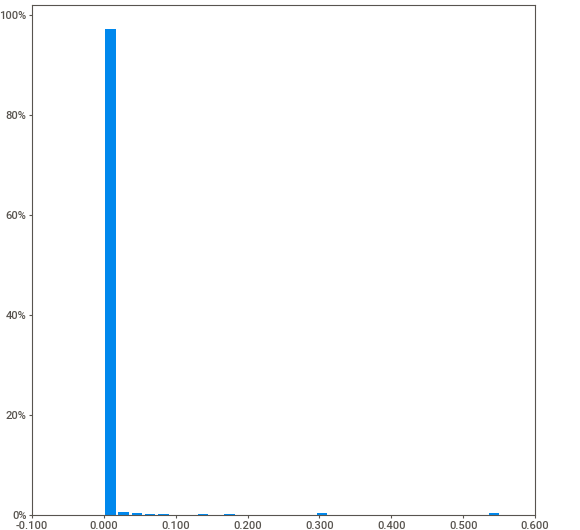
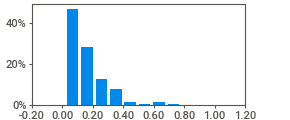
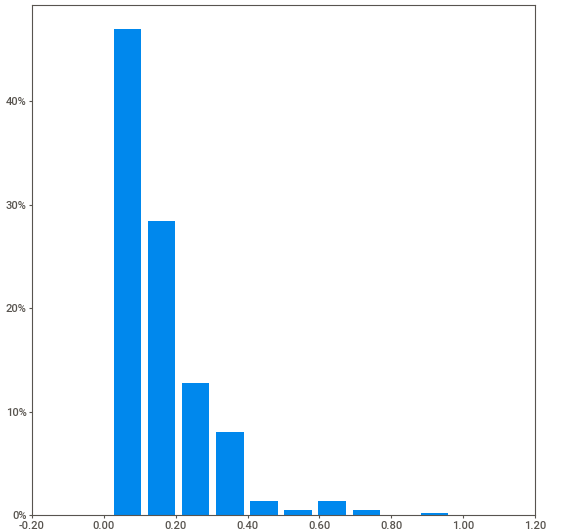
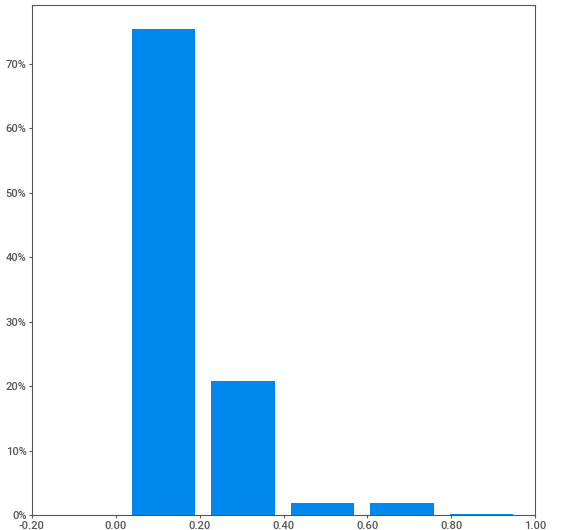
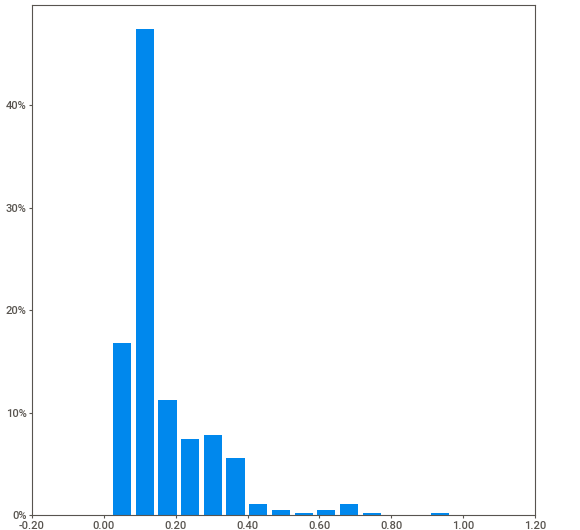
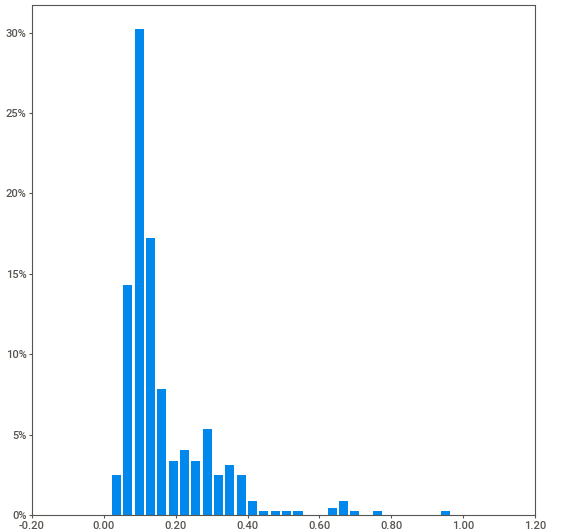
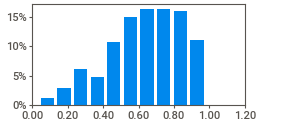
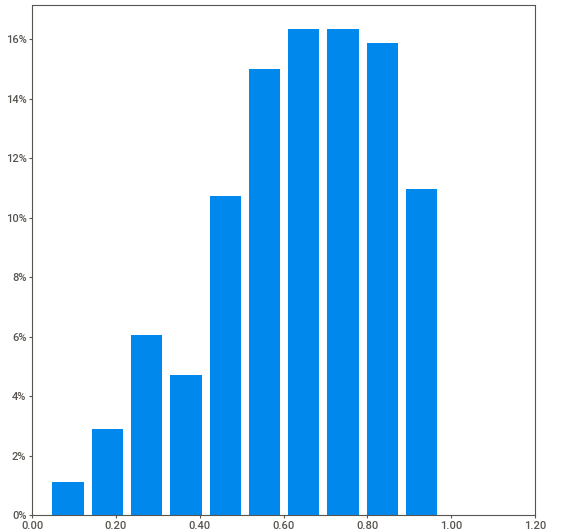
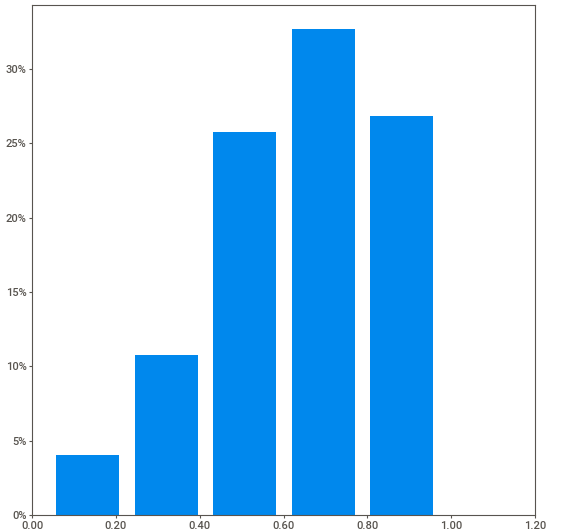
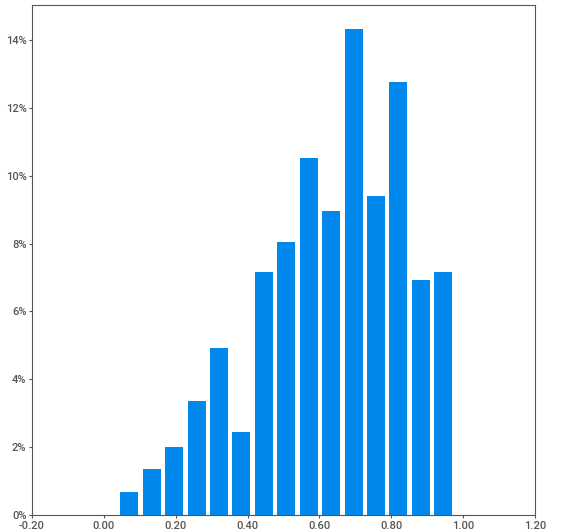
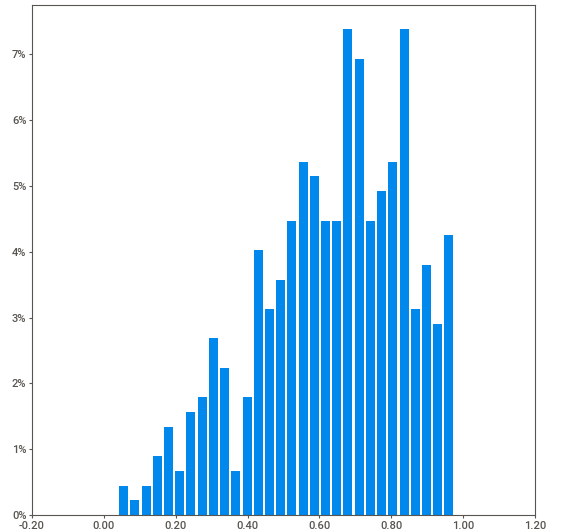
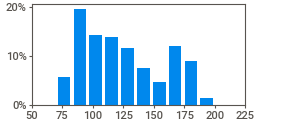
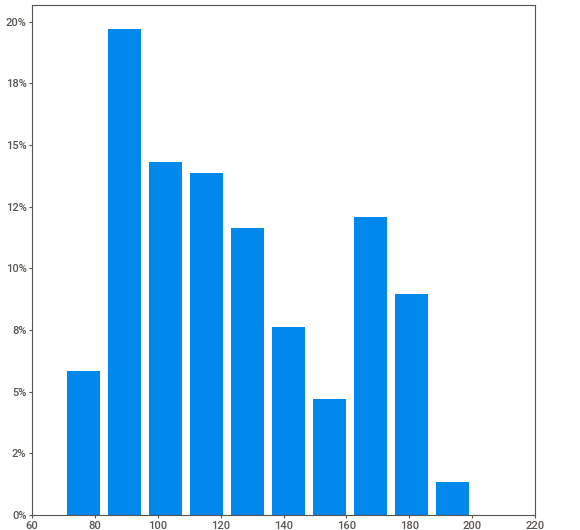
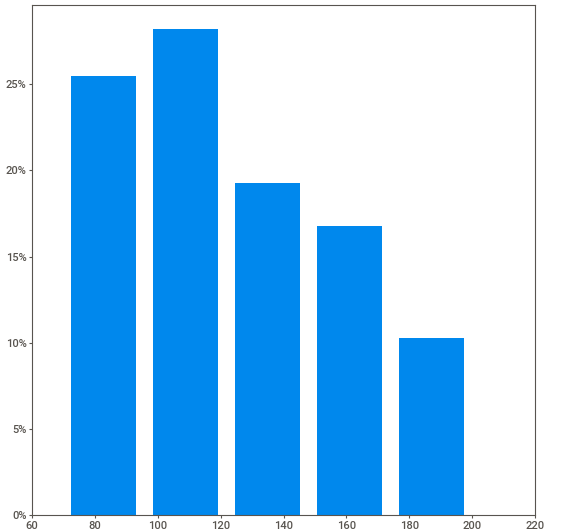
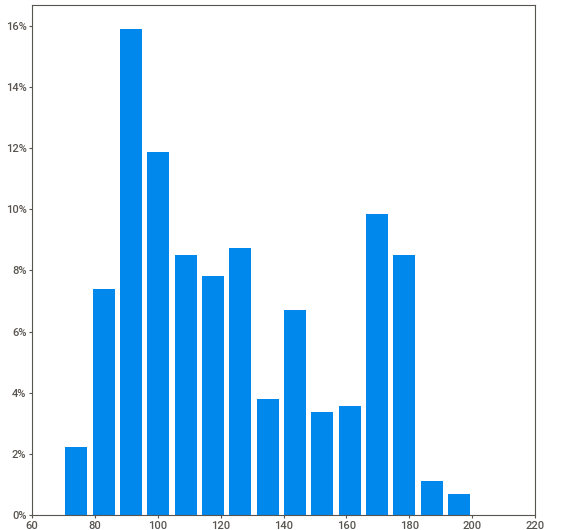
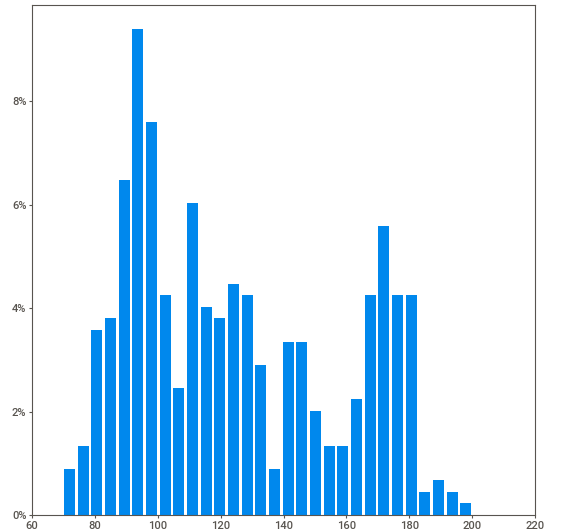
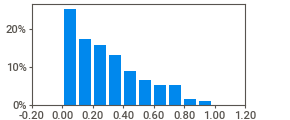
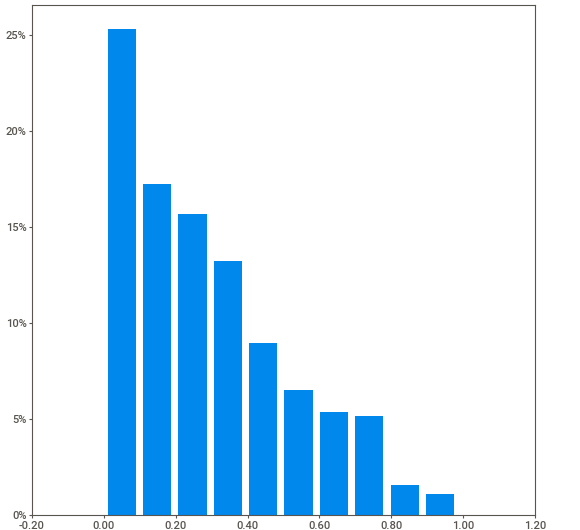
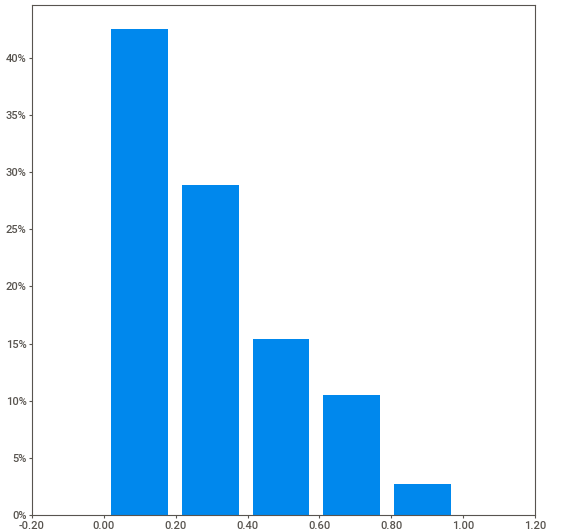
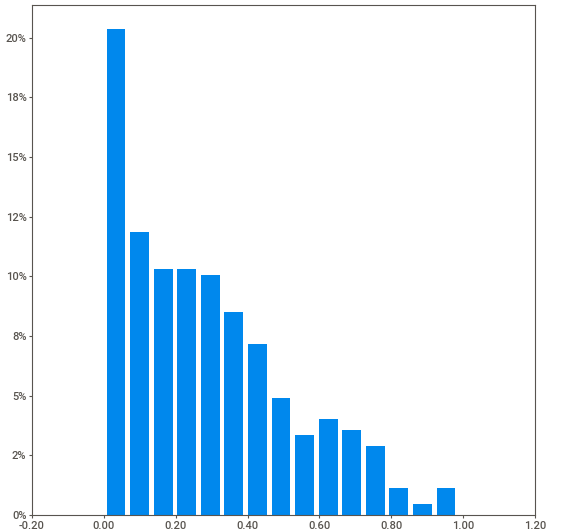
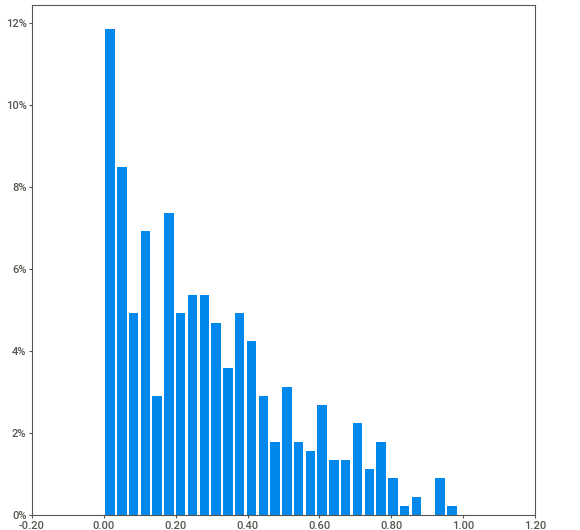
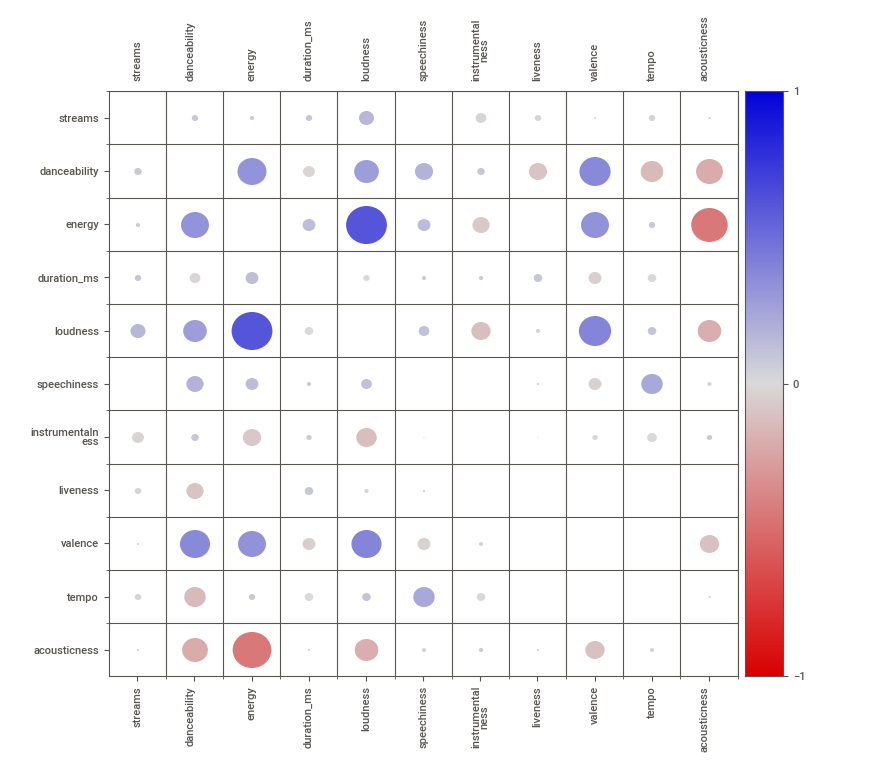
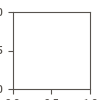

In [14]:
import sweetviz as sv
import pandas as pd
music=pd.read_parquet('../data/processed/Streamsfeatures.parquet')
music=music.drop(columns=['uri'])
my_report = sv.analyze(music)
my_report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)

Despues de revisar el reporte y como trabajare con una regresion lineal decidi revisar mas a fondo la correlacion entre las variables

No considere la columna 'instrumentalnes ya que todos sus valores son cero o muy cercanos a cero.

In [119]:
archivo = '../data/processed/Streamsfeatures.parquet'
df = pd.read_parquet(archivo)  
df['instrumentalness']

0      0.000013
1      0.001280
2      0.007490
3      0.000000
4      0.000000
         ...   
442    0.000000
443    0.000000
444    0.000052
445    0.000000
446    0.000000
Name: instrumentalness, Length: 447, dtype: float64

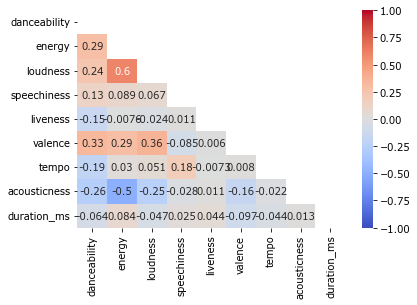

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
archivo = "../data/interim/Streamsfeatures.parquet"
df = pd.read_parquet(archivo,columns=['danceability','energy','loudness','speechiness','liveness','valence','tempo','acousticness','duration_ms'])
#print(df)
df=pd.DataFrame(df)
upp_mat = np.triu(df.corr())
fig=sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)
#plt.show()

### Observando tendencias en los datos

Realize visualizacion de los datos en altair para ver si existen cierta tendencia en los datos antes de implementar el modelo de regresion multiple.

In [27]:
import pandas as pd 
import altair as alt
import numpy as np
data=pd.read_parquet("../data/processed/Streamsfeatures.parquet")

df=pd.DataFrame(data,columns=['streams','danceability','energy','duration_ms','loudness','speechiness','instrumentalness','liveness','valence','tempo','acousticness'])

alt.Chart(df).mark_circle(size=60).encode(
    x='danceability',
    y='streams',
    tooltip=['danceability','streams']
).interactive()

alt.Chart(...)

In [28]:
alt.Chart(df).mark_circle(size=60).encode(
    x= 'energy',
    y='streams',
    tooltip=[ 'energy','streams']
).interactive()

alt.Chart(...)

In [29]:
alt.Chart(df).mark_circle(size=60).encode(
    x='duration_ms',
    y='streams',
    tooltip=['duration_ms','streams']
).interactive()

alt.Chart(...)

Se observa que en algunas variables hay cierta tendencia a si que procedí a proponer modelos de regresión múltiple:

In [114]:
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
data=pd.read_parquet("../data/processed/Streamsfeatures.parquet")

### Future Scaling

En este caso por propiedad de la regresión se pueden cambiar las unidades de medición y por eso decidi aplicar el logaritmo a la columna 'streams' y 'duration_ms' ya que acorta las distancias y los cambios se ven porcentualmente.

In [115]:
df=pd.DataFrame(data,columns=['streams','duration_ms','loudness'])
df['logduration'] = np.log(data['duration_ms'])
df['logstreams'] = np.log(data['streams'])
df.head(150)

,streams,duration_ms,loudness,logduration,logstreams
0,608040,187429,-5.422,12.141155,13.317996
1,609073,226280,-9.832,12.329528,13.319693
2,609256,278547,-7.935,12.537342,13.319994
3,609591,173711,-6.476,12.065148,13.320544
4,610280,178627,-10.732,12.093055,13.321673
...,...,...,...,...,...
145,4257970,185080,-4.460,12.128543,15.264303
146,4315804,199552,-4.026,12.203830,15.277794
147,4459470,191945,-3.945,12.164964,15.310540
148,4480757,189050,-6.521,12.149767,15.315303


In [116]:
x=df.drop(['streams','logstreams','duration_ms'],axis=1).values
y=df['logstreams'].values

In [117]:
x[:10]

array([[ -5.422     ,  12.14115539],
       [ -9.832     ,  12.32952845],
       [ -7.935     ,  12.53734209],
       [ -6.476     ,  12.06514828],
       [-10.732     ,  12.09305511],
       [ -7.056     ,  12.22895386],
       [ -7.594     ,  12.4134973 ],
       [ -3.455     ,  12.12702944],
       [ -5.979     ,  12.2626987 ],
       [ -3.604     ,  12.36873556]])

In [118]:
y[:10]

array([13.31799595, 13.31969341, 13.31999382, 13.32054352, 13.32167315,
       13.32740976, 13.33253516, 13.33366104, 13.33504277, 13.3361836 ])

Al no ser tantos datos decidí dividir los datos en 2 un 80% para entrenamiento y el restante para prueba.

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,shuffle=True)

In [94]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [95]:
y_pred=ml.predict(x_test)
#print(y_pred)

Ya entrenado el modelo decidi testear con los valores:(-10.732, 12.093055)=	13.321673

In [96]:
ml.predict([[-10.732,12.093055]])

array([15.29989714])

Como se observa se tuvo un error de 1 a 2 unidades aproximadamente

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.0033332566649402207

Text(0.5, 1.0, 'Actual vs Predicted')

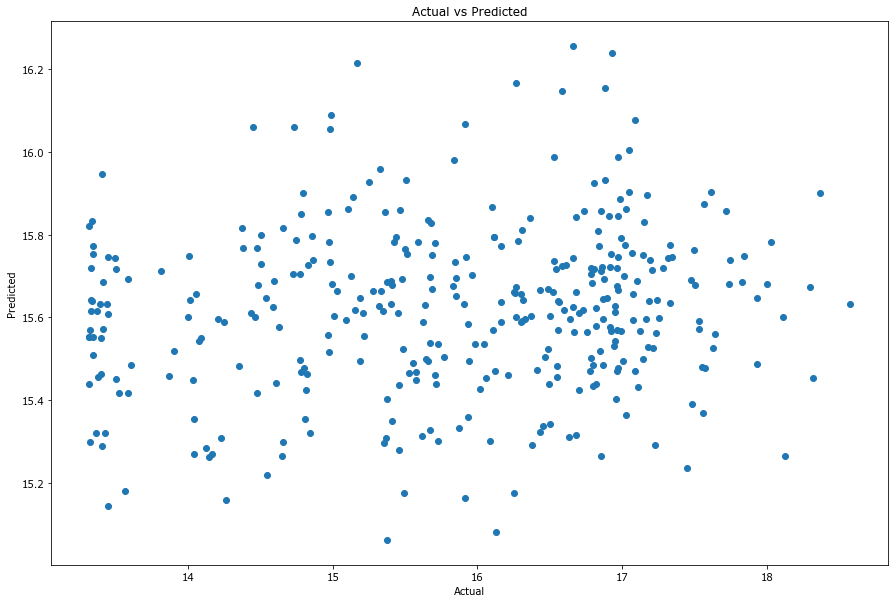

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [99]:
pred_y_df=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Diference':y_test-y_pred})
pred_y_df[100:110]

,Actual value,Predicted value,Diference
100,14.017907,15.643245,-1.625338
101,16.677594,15.315640,1.361955
102,15.277794,15.664261,-0.386467
103,13.494782,15.742782,-2.248000
104,18.027517,15.783093,2.244424
105,16.963015,15.676096,1.286919
106,17.484404,15.390553,2.093850
107,16.734148,15.857325,0.876823
108,17.930565,15.488296,2.442269
109,13.430565,15.322098,-1.891532
